In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score , make_scorer
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [5]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [9]:
df.drop(['customerID'],axis=1,inplace=True)

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df.drop(['StreamingTV'],axis=1,inplace=True)

In [19]:
#because we want to draw tree at the end for that we have to remove white space by replacing them _ (underscore char).
df.replace(' ','_',regex=True,inplace=True)

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,One_year,No,Mailed_check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes


In [21]:
#here there is no space between column names so we don't have to do anything
#but suppose we have to do so how we can do it
df.columns=df.columns.str.replace(' ','_')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,One_year,No,Mailed_check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes


In [22]:
#xgboost has default behaviour for missing data so we all have to do is to identify missing values and make sure they are set to zero


In [23]:
df['TotalCharges'].value_counts()

_          11
20.2       11
19.75       9
19.65       8
19.9        8
           ..
3673.6      1
3255.35     1
5409.75     1
220.95      1
111.4       1
Name: TotalCharges, Length: 6531, dtype: int64

In [26]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [27]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [29]:
#convert this object to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])


ValueError: Unable to parse string "_" at position 488

#look at the error here it shows that there are some empty string in Total Charges which can not be converted to numeric
#So there is the reason behind the dtype of total charges is Object


the Unique thing about XGBOOST is that it handle the missing value very well So wh have to only assign 0 to missing data if they are not in very huge amount

In [35]:
len(df.loc[df['TotalCharges'] == '_'])

11

In [36]:
df.loc[df['TotalCharges'] == '_']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,Two_year,Yes,Bank_transfer_(automatic),52.55,_,No
753,Male,0,No,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.25,_,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Two_year,No,Mailed_check,80.85,_,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.75,_,No
1340,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,Yes,Yes,Yes,No,Two_year,No,Credit_card_(automatic),56.05,_,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,19.85,_,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.35,_,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.00,_,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,One_year,Yes,Mailed_check,19.70,_,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,No,Two_year,No,Mailed_check,73.35,_,No


In [37]:
df.loc[(df['TotalCharges']=='_'),'TotalCharges']=0

In [38]:
df.loc[df['TotalCharges'] == '_']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [39]:
df.loc[df['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,Two_year,Yes,Bank_transfer_(automatic),52.55,0,No
753,Male,0,No,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.25,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Two_year,No,Mailed_check,80.85,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.75,0,No
1340,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,Yes,Yes,Yes,No,Two_year,No,Credit_card_(automatic),56.05,0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,19.85,0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.35,0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.00,0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,One_year,Yes,Mailed_check,19.70,0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,No,Two_year,No,Mailed_check,73.35,0,No


In [40]:
#so our we replace null with zero but still the datatype is object
#and XGBOOST only allows int,float or boolean
#so now convert and run the error code again
#convert this object to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])



In [41]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [42]:
X=df.drop(['Churn'],axis=1).copy()
Y=df['Churn'].copy()

In [44]:
pd.get_dummies(X,columns=['gender']).head()
#this is only for checking now convert and save

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender_Female,gender_Male
0,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,1,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,One_year,No,Mailed_check,56.95,1889.50,0,1
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,0,1
3,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,0,1
4,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1,0


In [46]:
X_encoded=pd.get_dummies(X,columns=['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

In [47]:
X_encoded.head()

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,Female,0,1,29.85,29.85,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,Male,0,34,56.95,1889.50,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,Male,0,2,53.85,108.15,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,Male,0,45,42.30,1840.75,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,Female,0,2,70.70,151.65,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [48]:
X_encoded=pd.get_dummies(X_encoded,columns=['gender'])

In [49]:
X_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,gender_Female,gender_Male
0,0,1,29.85,29.85,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,1,0,0,1,...,1,0,1,0,0,0,0,1,0,1
2,0,2,53.85,108.15,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
4,0,2,70.70,151.65,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [50]:
Y.unique()

array(['No', 'Yes'], dtype=object)

In [53]:
Y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [54]:
Y.replace('No','0',regex=True,inplace=True)
Y.head()

0      0
1      0
2    Yes
3      0
4    Yes
Name: Churn, dtype: object

In [56]:
Y.replace('Yes',1,regex=True,inplace=True)

In [57]:
Y.replace('0',0,regex=True,inplace=True)

In [58]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [59]:
sum(Y)/len(Y)

0.2653698707936959

In [61]:
#here we can say that data is imbalanced so we have to us some kind of function
#here we are spliting data with the help of stratification function in order to maintain same percentage of people who left the company in training as well as testing dataset.
X_train,X_test,Y_train,Y_test=train_test_split(X_encoded,Y,random_state=42,stratify=Y)

In [62]:
#let's check this out
sum(Y_train)/len(Y_train)

0.2654297614539947

In [63]:
sum(Y_test)/len(Y_test)

0.26519023282226006

In [67]:
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',missing=None, seed=42)
#first parameter is for binary classification it does with approach of logistic regression
#here missing value is none

clf_xgb.fit(X_train,Y_train,verbose=True,
           early_stopping_rounds=25,#if prediction not improves than it will only add 10 more trees after that one
           eval_metric='aucpr',#use this metrics for evaluation
           eval_set=[(X_test,Y_test)])#evaluate on the bassis of test data

[0]	validation_0-aucpr:0.63160
[1]	validation_0-aucpr:0.64538
[2]	validation_0-aucpr:0.64402
[3]	validation_0-aucpr:0.64429
[4]	validation_0-aucpr:0.63866
[5]	validation_0-aucpr:0.63419
[6]	validation_0-aucpr:0.63912
[7]	validation_0-aucpr:0.63787
[8]	validation_0-aucpr:0.63779
[9]	validation_0-aucpr:0.63892
[10]	validation_0-aucpr:0.63678
[11]	validation_0-aucpr:0.63827
[12]	validation_0-aucpr:0.63793
[13]	validation_0-aucpr:0.63894
[14]	validation_0-aucpr:0.63911
[15]	validation_0-aucpr:0.63865
[16]	validation_0-aucpr:0.64037
[17]	validation_0-aucpr:0.64038
[18]	validation_0-aucpr:0.64101
[19]	validation_0-aucpr:0.64075
[20]	validation_0-aucpr:0.63828
[21]	validation_0-aucpr:0.63615
[22]	validation_0-aucpr:0.63784
[23]	validation_0-aucpr:0.63728
[24]	validation_0-aucpr:0.63631
[25]	validation_0-aucpr:0.63581


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

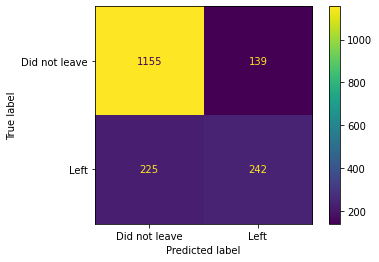

In [70]:
#performance on testing dataset
plot_confusion_matrix(clf_xgb,X_test,Y_test,values_format='d',display_labels=['Did not leave','Left'])

XGboost has a parameter scale_pos_weight that helps with imbalance data it actually scales the minority so the chances of
misclassification of minorty class gets heighr and model tries to corectly identify them and gives more focus to them

##Optimizing parameter using cross validation and grid search()

# parameters are
max_depth
learning_rate
gamma #the para that encourages prunning
reg_lambda #regulrization parameter lambda


when data are imbalanced the xgboost manual says
if you only care about the overall performance metric(AUC) of your prediction
    balance the positive and negitive weights via scale_pos_weight
    USe AUC for evaluation

In [83]:
param_grid={
    'max_depth':[4],
    'learning_rate':[0.1,0.5,1],
    'gamma':[0.25],
    'reg_lambda':[10.0,20,100],
    'scale_pos_weight':[1,3,5] #XGboost recommends sum(negative instances)/sum(positive instances) 
}

In [84]:
#to speed up a cross validation  and to further prevent overfitting
#we are only using random subset of the feature(50%) and 90%(rows) per tree.
optimal_params=GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                       seed=42,
                                                       subsample=0.50,
                                                       colsample_bytree=0.5),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           verbose=2, #if want to see what grid search is doing then set the verbose 2
                           n_jobs=10,
                           cv=3)


In [85]:
optimal_params.fit(X_train,Y_train,early_stopping_rounds=15,
                  eval_metric='auc',
                  eval_set=[(X_test,Y_test)],
                   verbose=False)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    5.2s
[Parallel(n_jobs=10)]: Done  81 out of  81 | elapsed:    7.8s finished
c:\users\len\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=0.5, tree_metho

In [86]:
print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 100, 'scale_pos_weight': 1}


##build model now

In [101]:
clf_xgb=xgb.XGBClassifier(seed=42,
                         objective='binary:logistic',
                         gamma=0.25,
                         learning_rate=0.1,
                          max_depth=4,
                          reg_lambda=100,
                          scale_pos_weight=3,
                          subsample=0.9,
                          colsample_bytree=0.5)
clf_xgb.fit(X_train,Y_train,verbose=True,early_stopping_rounds=15,eval_metric='aucpr',eval_set=[(X_test,Y_test)])

[0]	validation_0-aucpr:0.51068
[1]	validation_0-aucpr:0.53988
[2]	validation_0-aucpr:0.55056
[3]	validation_0-aucpr:0.55283
[4]	validation_0-aucpr:0.55405
[5]	validation_0-aucpr:0.58415
[6]	validation_0-aucpr:0.59465
[7]	validation_0-aucpr:0.59935
[8]	validation_0-aucpr:0.60296
[9]	validation_0-aucpr:0.60607
[10]	validation_0-aucpr:0.60744
[11]	validation_0-aucpr:0.60917
[12]	validation_0-aucpr:0.61004
[13]	validation_0-aucpr:0.60954
[14]	validation_0-aucpr:0.61145
[15]	validation_0-aucpr:0.61210
[16]	validation_0-aucpr:0.61770
[17]	validation_0-aucpr:0.61770
[18]	validation_0-aucpr:0.61801
[19]	validation_0-aucpr:0.61709
[20]	validation_0-aucpr:0.61713
[21]	validation_0-aucpr:0.63126
[22]	validation_0-aucpr:0.63306
[23]	validation_0-aucpr:0.63312
[24]	validation_0-aucpr:0.63407
[25]	validation_0-aucpr:0.63208
[26]	validation_0-aucpr:0.62530
[27]	validation_0-aucpr:0.62463
[28]	validation_0-aucpr:0.62421
[29]	validation_0-aucpr:0.63140
[30]	validation_0-aucpr:0.63462
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=100, scale_pos_weight=3, seed=42,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

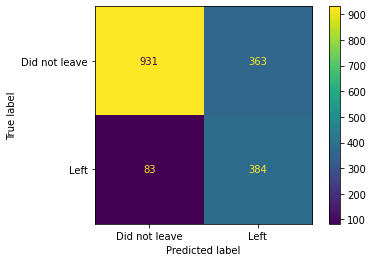

In [102]:
plot_confusion_matrix(clf_xgb,X_test,Y_test,values_format='d',display_labels=['Did not leave','Left'])

In [103]:
clf_xgb=xgb.XGBClassifier(seed=42,
                         objective='binary:logistic',
                         gamma=0.25,
                         learning_rate=0.1,
                          max_depth=4,
                          reg_lambda=150,
                          scale_pos_weight=3,
                          subsample=0.9,
                          colsample_bytree=0.5,
                         n_estimators=1)##we sat this to 1 so we can get gain,cover etc
clf_xgb.fit(X_train,Y_train)

[18:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=150, scale_pos_weight=3, seed=42,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

#if we want to get info like gain and cover etc at each node in the first tree we just build the first tree 
otherwise we will get the average over all of the trees

In [104]:
bst=clf_xgb.get_booster()
for importance_type in ('weight','gain','cover','total_gain','total_cover'):
    print("%s: "% importance_type, bst.get_score(importance_type=importance_type))
        

weight:  {'Contract_Month-to-month': 1, 'MonthlyCharges': 5, 'Contract_One_year': 1, 'InternetService_Fiber_optic': 1, 'OnlineBackup_No': 1, 'PhoneService_Yes': 1}
gain:  {'Contract_Month-to-month': 1384.05676, 'MonthlyCharges': 10.831567949, 'Contract_One_year': 0.26826632, 'InternetService_Fiber_optic': 211.065186, 'OnlineBackup_No': 55.4818878, 'PhoneService_Yes': 6.14847183}
cover:  {'Contract_Month-to-month': 1820.25, 'MonthlyCharges': 362.85, 'Contract_One_year': 22.5, 'InternetService_Fiber_optic': 1210.75, 'OnlineBackup_No': 458.5, 'PhoneService_Yes': 208.0}
total_gain:  {'Contract_Month-to-month': 1384.05676, 'MonthlyCharges': 54.157839745000004, 'Contract_One_year': 0.26826632, 'InternetService_Fiber_optic': 211.065186, 'OnlineBackup_No': 55.4818878, 'PhoneService_Yes': 6.14847183}
total_cover:  {'Contract_Month-to-month': 1820.25, 'MonthlyCharges': 1814.25, 'Contract_One_year': 22.5, 'InternetService_Fiber_optic': 1210.75, 'OnlineBackup_No': 458.5, 'PhoneService_Yes': 208.0}